## Understanding Linear Regression algorithm through students marks prediction

In [1]:
# !pip install scikit-learn

## Importing required libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### writing random seed to maintain reproducibility

In [3]:
np.random.seed(42)

### Generate the synthetic data for 100 students


In [4]:
n_students = 100
study_hours = np.random.uniform(0, 10, n_students)

In [9]:
study_hours

array([3.74540119, 9.50714306, 7.31993942, 5.98658484, 1.5601864 ,
       1.5599452 , 0.58083612, 8.66176146, 6.01115012, 7.08072578,
       0.20584494, 9.69909852, 8.32442641, 2.12339111, 1.81824967,
       1.8340451 , 3.04242243, 5.24756432, 4.31945019, 2.9122914 ,
       6.11852895, 1.39493861, 2.92144649, 3.66361843, 4.56069984,
       7.85175961, 1.99673782, 5.14234438, 5.92414569, 0.46450413,
       6.07544852, 1.70524124, 0.65051593, 9.48885537, 9.65632033,
       8.08397348, 3.04613769, 0.97672114, 6.84233027, 4.40152494,
       1.22038235, 4.9517691 , 0.34388521, 9.09320402, 2.58779982,
       6.62522284, 3.11711076, 5.20068021, 5.46710279, 1.84854456,
       9.69584628, 7.75132823, 9.39498942, 8.9482735 , 5.97899979,
       9.21874235, 0.88492502, 1.95982862, 0.45227289, 3.25330331,
       3.8867729 , 2.71349032, 8.28737509, 3.56753327, 2.8093451 ,
       5.42696083, 1.40924225, 8.02196981, 0.74550644, 9.86886937,
       7.72244769, 1.98715682, 0.05522117, 8.15461428, 7.06857

### Calculate the marks by defining the slope, intercept and noise

In [10]:
noise_factor = np.random.normal(0, 5, n_students)

true_slope = 7
true_intercept = 30
marks = true_slope * study_hours + true_intercept + noise_factor

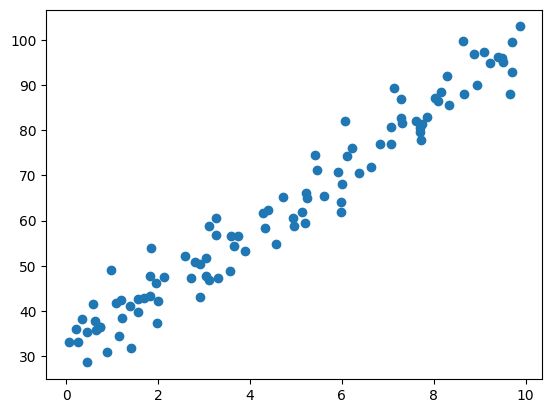

In [11]:
plt.scatter(x = study_hours, y = marks)
plt.show()

In [12]:
marks

array([ 56.65304366,  95.0549647 ,  81.69837981,  61.96824932,
        39.82294539,  42.70517928,  41.45532308,  88.04097911,
        68.03558281,  77.05629523,  36.01792519,  99.5374452 ,
        85.62218384,  47.43007491,  43.21313545,  47.68154064,
        47.78669154,  65.09463948,  58.27561054,  43.06846507,
        74.31030402,  41.06984661,  50.47569268,  54.47239336,
        54.84804518,  82.85909068,  42.26359217,  61.98502434,
        70.66259126,  35.27178317,  81.95906914,  42.80957772,
        35.84136346,  96.04975803,  88.00038624,  86.45524499,
        51.62411489,  49.15325854,  76.93450703,  62.31841127,
        38.36911759,  58.81899352,  38.12131055,  97.41209331,
        52.06975845,  71.82962263,  58.83374688,  59.39550617,
        71.20400502,  53.89209002,  92.91824232,  81.42780899,
        96.26318273,  90.12053626,  64.09968136,  94.87401133,
        30.88295658,  46.08676252,  28.56878905,  60.52279518,
        53.29114382,  47.38412464,  92.07921173,  48.81

### Clip the mark so that it is between 0 and 100

In [13]:
marks = np.clip(0, 100, marks)

In [14]:
marks

array([ 56.65304366,  95.0549647 ,  81.69837981,  61.96824932,
        39.82294539,  42.70517928,  41.45532308,  88.04097911,
        68.03558281,  77.05629523,  36.01792519,  99.5374452 ,
        85.62218384,  47.43007491,  43.21313545,  47.68154064,
        47.78669154,  65.09463948,  58.27561054,  43.06846507,
        74.31030402,  41.06984661,  50.47569268,  54.47239336,
        54.84804518,  82.85909068,  42.26359217,  61.98502434,
        70.66259126,  35.27178317,  81.95906914,  42.80957772,
        35.84136346,  96.04975803,  88.00038624,  86.45524499,
        51.62411489,  49.15325854,  76.93450703,  62.31841127,
        38.36911759,  58.81899352,  38.12131055,  97.41209331,
        52.06975845,  71.82962263,  58.83374688,  59.39550617,
        71.20400502,  53.89209002,  92.91824232,  81.42780899,
        96.26318273,  90.12053626,  64.09968136,  94.87401133,
        30.88295658,  46.08676252,  28.56878905,  60.52279518,
        53.29114382,  47.38412464,  92.07921173,  48.81

### Create a dataframe for better visualization

In [15]:
student_df = pd.DataFrame({
    "Study_Hours": study_hours,
    "Marks": marks
})
student_df.head(5)

,Study_Hours,Marks
0,3.745401,56.653044
1,9.507143,95.054965
2,7.319939,81.698380
3,5.986585,61.968249
4,1.560186,39.822945


### visulize the data (scatter plot)

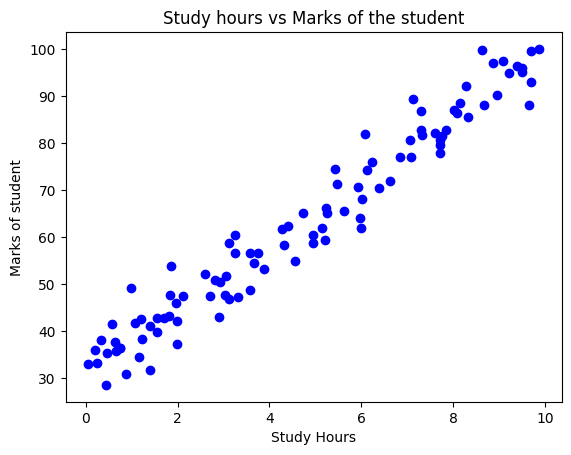

In [20]:
plt.scatter(x = study_hours, y = marks, c = 'blue')
plt.xlabel("Study Hours")
plt.ylabel("Marks of student")
plt.title("Study hours vs Marks of the student")
plt.show()

### Split the data into features and target

In [22]:
X = student_df[["Study_Hours"]].values
y = student_df["Marks"].values

### Split the data into training and testing (80% train and 20% test)

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

### Checking the shape after splitting

In [27]:
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of X_train: (80, 1)
Shape of X_test: (20, 1)
Shape of y_train: (80,)
Shape of y_test: (20,)


### Create and train the Linear regression model

In [28]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


### Make the prediction on test data

In [29]:
y_pred = model.predict(X_test)

In [31]:
y_pred

array([35.09123218, 91.42179221, 83.11504019, 75.67974665, 48.3203359 ,
       60.61096045, 50.58127715, 89.27203511, 32.17912866, 56.16476816,
       60.05478469, 71.95422632, 86.04359715, 95.08502028, 38.88847878,
       41.35676105, 83.04900889, 35.80183155, 87.19432116, 42.33971843])

### Evaluate the model


In [36]:
compare = pd.DataFrame({
    "Study_Hours": X_test.reshape(20),
    "Actual": y_test,
    "Predicted": y_pred
})
compare.round(3)

,Study_Hours,Actual,Predicted
0,0.636,37.732,35.091
1,8.948,90.121,91.422
2,7.722,77.872,83.115
3,6.625,71.830,75.680
4,2.588,52.070,48.320
5,4.402,62.318,60.611
6,2.921,50.476,50.581
7,8.631,99.746,89.272
8,0.206,36.018,32.179
9,3.745,56.653,56.165


# Display the result

In [41]:
print(f"Slope (model learned): {model.coef_[0]}")
print(f"Intercept (model learned): {model.intercept_}")

print("Equation of our trained model: ")
print(f"marks = study_hours * {model.coef_[0]} + {model.intercept_}")

Slope (model learned): 6.776453834249748
Intercept (model learned): 30.784229911883948
Equation of our trained model: 
marks = study_hours * 6.776453834249748 + 30.784229911883948


### Visualize the regression line

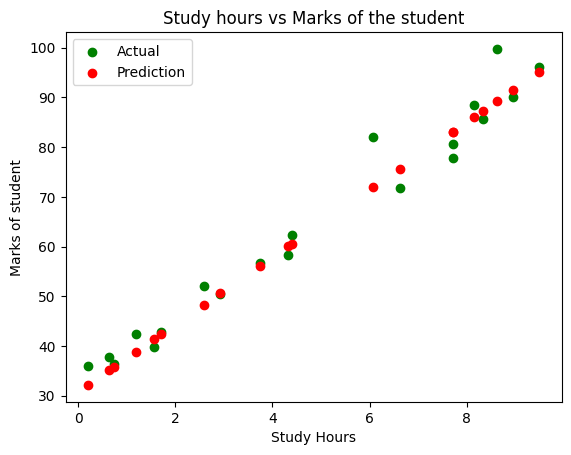

In [52]:
plt.scatter(x = X_test, y = y_test, c = 'green', label = "Actual")
plt.scatter(x = X_test, y = y_pred, c = 'red', label = "Prediction")
plt.xlabel("Study Hours")
plt.ylabel("Marks of student")
plt.title("Study hours vs Marks of the student")
plt.legend()
plt.show()

### Make a prediction for new students

In [56]:
new_study_hours = [[10]]
marks_predicted = model.predict(new_study_hours)

In [57]:
print(f"The predicted marks of student who studies {new_study_hours[0][0]} is {marks_predicted[0].round(2)}")

The predicted marks of student who studies 10 is 98.55
